# Data analytics project 5

This project  is purposed to improve my data analytics, data visualization, and ML modelling skills

Dataset describes the Airbnb listing activity and metrics in NYC, NY for 2019. It includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

<b>Created by: Rizki Yoga Marsyamni</b>
Source (Kagle/Open dataset): https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## Import some python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Data Extraction

In [83]:
file_airBnB="Data/AB_NYC_2019.csv"
df=pd.read_csv(file_airBnB)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Exploratory data analysis (EDA)

In [85]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [86]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [87]:
df.shape

(48895, 16)

## Cleaning Null/Na data from from the entire columns
I try to handling missing value with drop the nan data from the table (to make it simple,especially for this case) but in the future i will handle similar problems without deleting the values

In [149]:
df1=df.dropna(axis=0)
df1.shape

(38821, 16)

## Convert some attributes to other type of values

In [150]:
#Converting last_review to datetime values
df1['last_review'] = pd.to_datetime(df1['last_review'])

#Converting host_id to string
df1['host_id'] = df1['host_id'].astype(str)

#convert room type from categorical to numerical
# df1['room_type'] = df1['room_type'].replace(
#     ["Private room", "Entire home/apt", "Shared room"], [1, 2, 3])



# #converting room type to str
# df1['room_type']=df1['room_type'].astype(str)


C:\Users\yoga\AppData\Local\Temp/ipykernel_2784/4216289280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['last_review'] = pd.to_datetime(df1['last_review'])
C:\Users\yoga\AppData\Local\Temp/ipykernel_2784/4216289280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_id'] = df1['host_id'].astype(str)


In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  object        
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  nu

In [152]:
df1['room_type'].value_counts()

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

## Dropping some features that have no correlation with the target value

In [153]:
df2=df1.drop(["name","host_id","host_name", "id","neighbourhood"], axis=1)



## Heatmap

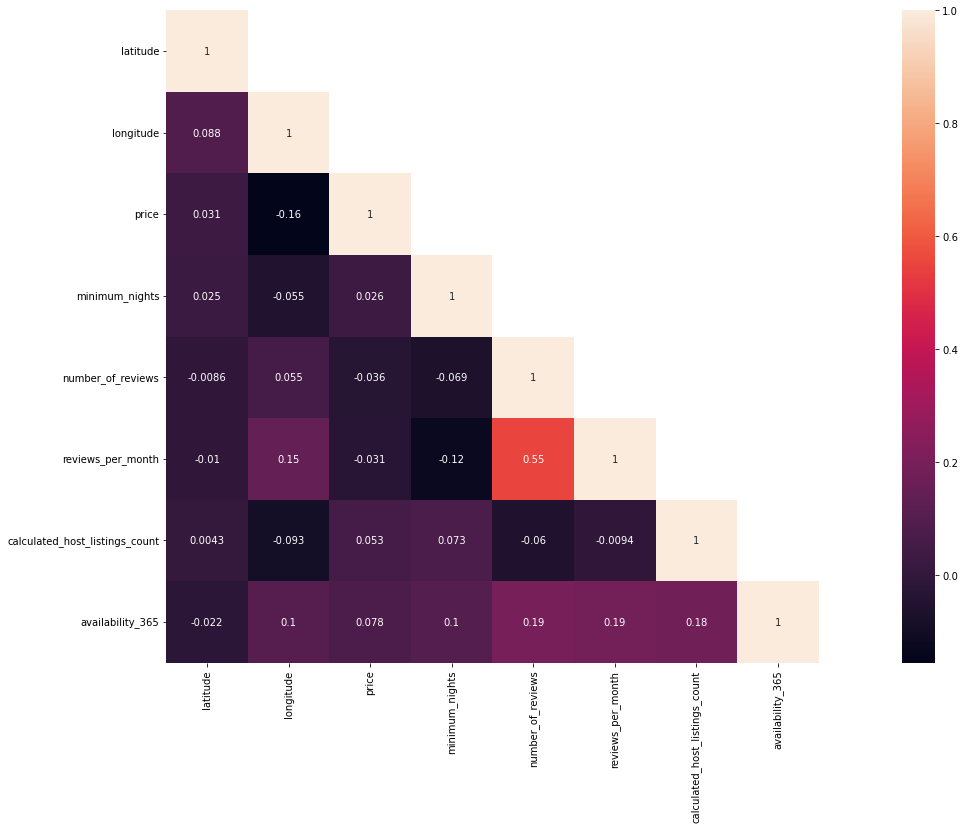

In [154]:
# corr_matrix = df1.corr()
# sns.heatmap(corr_matrix, annot=True, fmt=".2f")

#Corelation matrix (beautiful way)
cor_mat = df2.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30, 12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)
plt.show()


## Visualize room type distribution from the whole data

<AxesSubplot:xlabel='room_type', ylabel='count'>

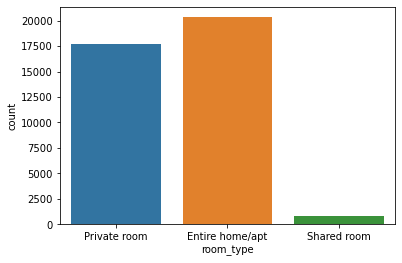

In [155]:
sns.countplot(data=df2, x=df2.room_type,)

In [156]:
df2.head()


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [157]:
df2.shape

(38821, 11)

## Feature Engineering
This process is used to handling categorical variables


In [160]:
# this is using technique "ONE-HOT  ENCODING"
df2_clean = pd.get_dummies(data=df2, columns=['neighbourhood_group','room_type'])


In [161]:
print("before handling categorical variables",df2.shape)
print("after handling categorical variables", df2_clean.shape)


before handling categorical variables (38821, 11)
after handling categorical variables (38821, 17)


In [163]:
df2_clean.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0
5,40.74767,-73.97500,200,3,74,2019-06-22,0.59,1,129,0,0,1,0,0,1,0,0


In [164]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   latitude                           38821 non-null  float64       
 1   longitude                          38821 non-null  float64       
 2   price                              38821 non-null  int64         
 3   minimum_nights                     38821 non-null  int64         
 4   number_of_reviews                  38821 non-null  int64         
 5   last_review                        38821 non-null  datetime64[ns]
 6   reviews_per_month                  38821 non-null  float64       
 7   calculated_host_listings_count     38821 non-null  int64         
 8   availability_365                   38821 non-null  int64         
 9   neighbourhood_group_Bronx          38821 non-null  uint8         
 10  neighbourhood_group_Brooklyn      

## Target Engineering

because of scewed data we must transform the log of price to  change the distribution from scewed to normal

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log_price'}>]], dtype=object)

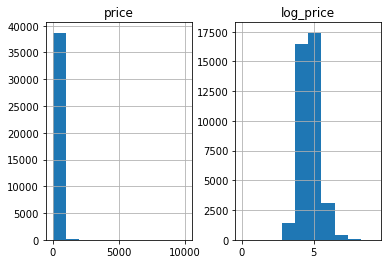

In [165]:
price=pd.DataFrame({'price':df2_clean['price'], 'log_price':np.log1p(df2_clean['price'])})
price.hist()

In [166]:
df2_clean['price']=np.log1p(df2_clean['price'])

### The output will change the price scale to logarithmic scale (to reduce scewed)

In [167]:
df2_clean.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,5.010635,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,5.420535,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
3,40.68514,-73.95976,4.499810,1,270,2019-07-05,4.64,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,4.394449,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0
5,40.74767,-73.97500,5.303305,3,74,2019-06-22,0.59,1,129,0,0,1,0,0,1,0,0


## Simple Modelling

In [168]:
X = df2_clean.drop(["price","last_review"], axis=1)
y = df2_clean["price"]

In [169]:
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.model_selection import cross_val_score

In [170]:
def rmse_cv(model):
    return np.sqrt(-cross_val_score(model, X, y, scoring = 'neg_mean_squared_error',cv=5))

In [171]:
# Model 1 :linear Regression
model_linear_reg =LinearRegression()
rmse_cv(model_linear_reg).mean()

0.46688534687259525

In [172]:
# Model 2 :Ridge Regression
model_ridge = RidgeCV(alphas=[1, 0.1, 0.01, 0.0005])
rmse_cv(model_ridge).mean()


0.46688696810297126

In [173]:
# Model 3 :Lasso Regression
model_lasso = LassoCV(alphas=[1, 0.1, 0.01, 0.0005])
rmse_cv(model_lasso).mean()


0.4676512318858757

In [174]:
coef= pd.Series(model_lasso.fit(X,y).coef_, index= X.columns)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

<AxesSubplot:>

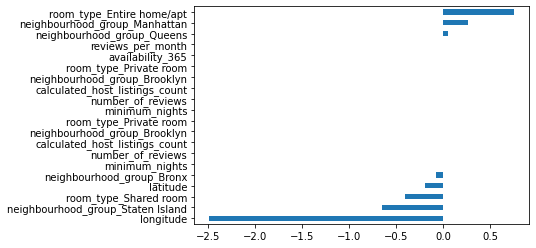

In [175]:
imp_coef.plot(kind='barh')

## <b>Try with other regression model to test some values (r2, MAE, MSE) </b>
 I try to explore more  analysis using some regression models. i really excited to try other models just to breakdown the output value from each model.
 ### Regression model that i use:
 1. K nearest neighbours (KNN-Models),
 2. Linear Regression,
 3. Random Forest Regressor, 
 4. Bagging Regressor, 
 5. Gradient Boosting Regressor, 
 6. Ada Boost Regressor

 ### The output value from models above:
 1. r squared score
 2. Mean squared error
 3. Mean absolute error

### <b>Objective: </b> Summarize the effectivity from each models to handle this case...

 in the end, we will see <b> *the value comparisons* </b> using bar chart from all of models..

In [176]:
df2_clean.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,5.010635,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,5.420535,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
3,40.68514,-73.95976,4.499810,1,270,2019-07-05,4.64,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,4.394449,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0
5,40.74767,-73.97500,5.303305,3,74,2019-06-22,0.59,1,129,0,0,1,0,0,1,0,0


In [177]:
# # menempatkan features and target ke dalam masing2 variabel X dan y
# X = np.array(df_ml[['season', 'month', 'hour', 'holiday', 'weekday',
#              'working_day', 'weather_situation', 'temperature', 'humidity']])
# #X = np.array(df_ml['season']).reshape(-1,1)
# y = np.array(df_ml['count'])


from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)


In [178]:
#  Import model yang digunakan
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor



# Mengimport parameter penilaian akurasi metode
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [207]:
model_KNN = KNeighborsRegressor(n_neighbors=3)
model_KNN.fit(X_train, y_train)

y_pred = model_KNN.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)



r-squared: 0.10242946311064349
Mean Absolute Error:  0.4721731512788233
Mean Squared Error:  0.3909522431528679


In [208]:
model_L_reg = LinearRegression()
model_L_reg.fit(X_train, y_train)

y_pred = model_L_reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)


r-squared: 0.5108755440903541
Mean Absolute Error:  0.33851848060820955
Mean Squared Error:  0.21304654660514366


In [211]:
model_Random_F_R = RandomForestRegressor()
model_Random_F_R.fit(X_train, y_train)

y_pred = model_Random_F_R.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)


r-squared: 0.6155342493032415
Mean Absolute Error:  0.29531951442862486
Mean Squared Error:  0.16746065236416896


In [209]:
model_B_Reg = BaggingRegressor()
model_B_Reg.fit(X_train, y_train)

y_pred = model_B_Reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)


r-squared: 0.5824530758195501
Mean Absolute Error:  0.30966438385324685
Mean Squared Error:  0.18186972490837236


In [210]:
model_Grad_Boost_Reg = GradientBoostingRegressor()
model_Grad_Boost_Reg.fit(X_train, y_train)

y_pred = model_Grad_Boost_Reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)


r-squared: 0.598214733414784
Mean Absolute Error:  0.3030231228537293
Mean Squared Error:  0.175004464586861


In [187]:
model_Ada_Boost_Reg = AdaBoostRegressor()
model_Ada_Boost_Reg .fit(X_train, y_train)

y_pred = model_Ada_Boost_Reg .predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)


r-squared: 0.0018801821521681195
Mean Absolute Error:  0.505855936701505
Mean Squared Error:  0.43474820717187135


In [189]:
models = [model_KNN, model_L_reg, model_Random_F_R, model_B_Reg, model_Grad_Boost_Reg, model_Ada_Boost_Reg]
r_Squared_all = []
for model in models:
    y_preds = model.predict(X_test)
    rsquared = r2_score(y_test, y_preds)
    r_Squared_all.append(rsquared)

print(r_Squared_all)


[0.10242946311064349, 0.5108755440903541, 0.6122919299286331, 0.5851342295880464, 0.5982269419889666, 0.0018801821521681195]


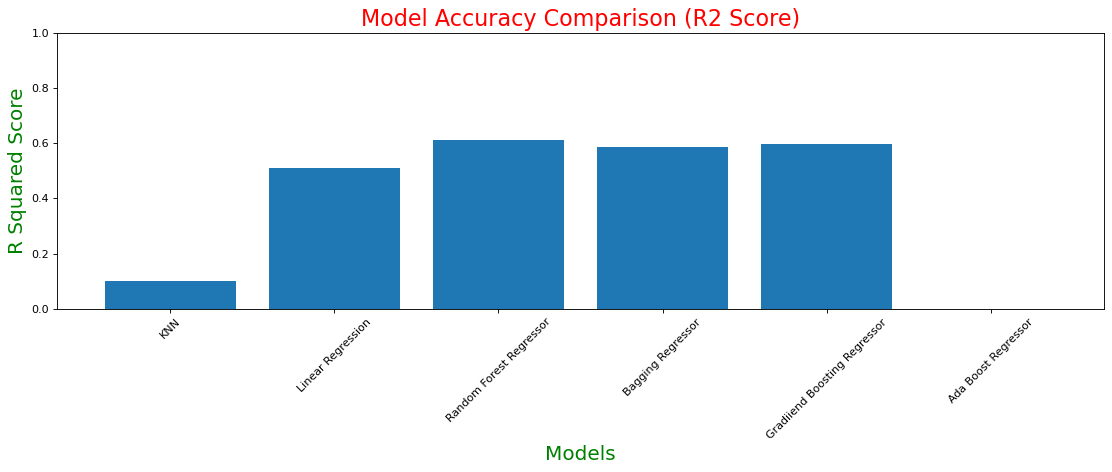

In [196]:
plt.figure(figsize=(14, 6), dpi=80)
plt.bar(['KNN', 'Linear Regression', 'Random Forest Regressor', 'Bagging Regressor',
        'Gradiiend Boosting Regressor', 'Ada Boost Regressor'], r_Squared_all)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison (R2 Score)", fontsize=20, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('R Squared Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()


In [201]:
models = [model_KNN, model_L_reg, model_Random_F_R,
          model_B_Reg, model_Grad_Boost_Reg, model_Ada_Boost_Reg]
mae_all = []
for model in models:
    y_preds = model.predict(X_test)
    mae_total = mean_absolute_error(y_test, y_preds)
    mae_all.append(mae_total)

print(mae_all)




[0.4721731512788233, 0.33851848060820955, 0.2963996934075941, 0.3081522108181098, 0.30301823191307303, 0.505855936701505]


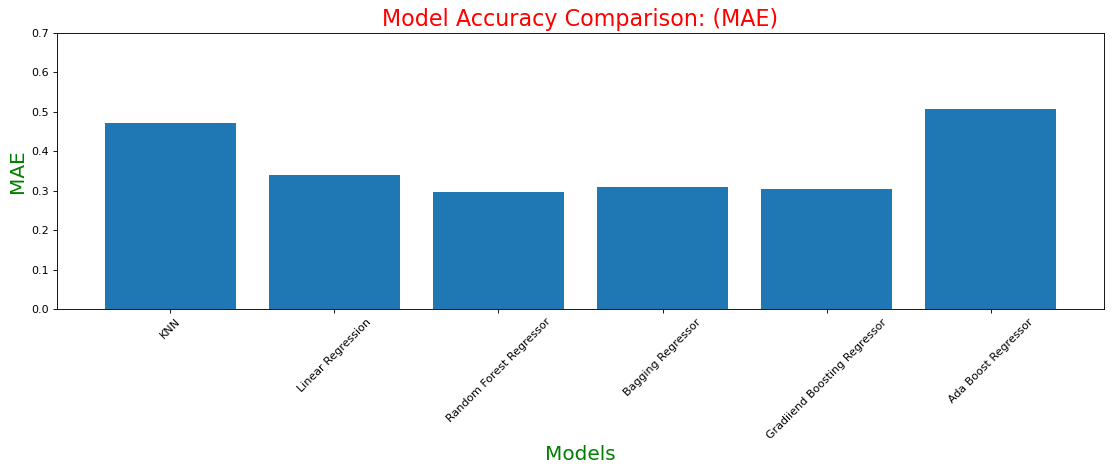

In [204]:
plt.figure(figsize=(14, 6), dpi=80)
plt.bar(['KNN', 'Linear Regression', 'Random Forest Regressor', 'Bagging Regressor',
        'Gradiiend Boosting Regressor', 'Ada Boost Regressor'], mae_all)
plt.ylim(0.0, 0.70)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison: (MAE)", fontsize=20, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('MAE', fontsize=18, color='g')
plt.tight_layout()
plt.show()


In [205]:
models = [model_KNN, model_L_reg, model_Random_F_R,
          model_B_Reg, model_Grad_Boost_Reg, model_Ada_Boost_Reg]
mse_all = []
for model in models:
    y_preds = model.predict(X_test)
    mse_total = mean_squared_error(y_test, y_preds)
    mse_all.append(mse_total)

print(mse_all)


[0.3909522431528679, 0.21304654660514366, 0.16887290018250103, 0.18070190239532055, 0.17499914693296503, 0.43474820717187135]


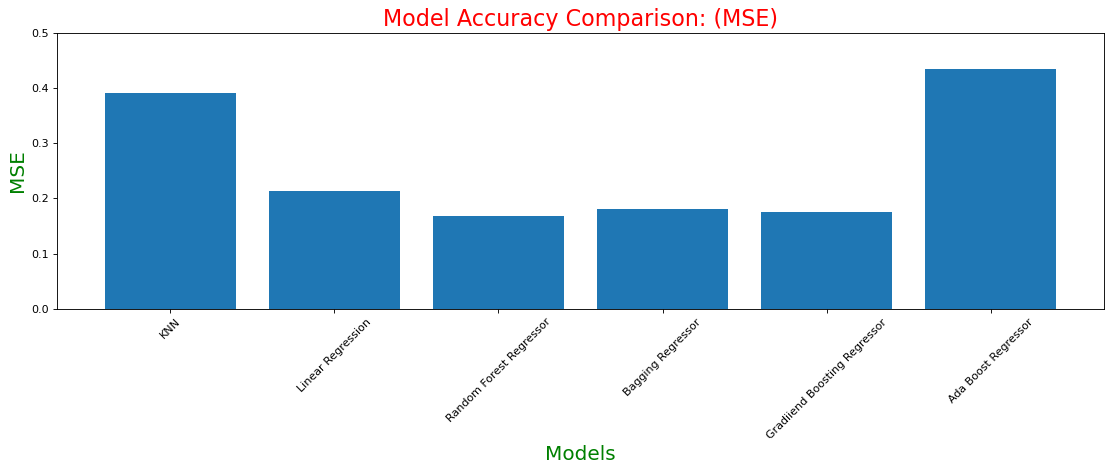

In [206]:
plt.figure(figsize=(14, 6), dpi=80)
plt.bar(['KNN', 'Linear Regression', 'Random Forest Regressor', 'Bagging Regressor',
        'Gradiiend Boosting Regressor', 'Ada Boost Regressor'], mse_all)
plt.ylim(0.0, 0.50)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison: (MSE)", fontsize=20, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('MSE', fontsize=18, color='g')
plt.tight_layout()
plt.show()


## <b> *Conclusion* </b>
- We choose Random forest regressor for the best model (based on the highest r2 score, and the lowest MAE and MSE score)
- When the number of features is large, it is preferable to use a higher number of regression trees, thats how random forest regressor works
- This analysis is not perfect and still need future improvements for better quality ML output. next time, i will try to improve the data preprocessing phase and provide better ML model with various dataset, and share the project on Github



Thank You!
### *Rizki Yoga Marsyamni*
